In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/home/revathy/Downloads/Micro Credit Project/Data file.csv")

In [3]:
df.head(20)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
5,6,1,35819I70783,568.0,2257.362667,2261.460000,368.13,380.13,2.0,0.0,...,6.0,0.0,3.0,18,6,0.0,11.000000,8.333333,UPW,2016-07-02
6,7,1,96759I84459,545.0,2876.641667,2883.970000,335.75,402.90,13.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-07-05
7,8,1,09832I90846,768.0,12905.000000,17804.150000,900.35,2549.11,4.0,55.0,...,6.0,0.0,7.0,42,6,0.0,6.000000,3.857143,UPW,2016-08-05
8,9,1,59772I84450,1191.0,90.695000,90.695000,2287.50,2287.50,1.0,0.0,...,6.0,0.0,4.0,24,6,0.0,2.666667,2.666667,UPW,2016-06-15
9,10,1,56331I70783,536.0,29.357333,29.357333,612.96,612.96,11.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-06-08


In [4]:
#drop first column since it is a same as that of index so we can drop it
df=df.drop(columns="Unnamed: 0")

In [5]:
#find shape of the dataset,there are 20L rows and 37 columns
df.shape

(209593, 36)

In [6]:
#find no of nulls in the dataset
#no null values in the list
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [7]:
#find categorical and non categorical values
Categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(Categorical)))

print('The categorical variables are :', Categorical)


There are 3 categorical variables

The categorical variables are : ['msisdn', 'pcircle', 'pdate']


In [8]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 33 numerical variables

The numerical variables are : ['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90']


In [9]:
#There are 34 categorical values and 3 numerical values 
#find value counts
for i in Categorical:
    print("----------"+i+"----------")
    print(df[i].value_counts())

----------msisdn----------
04581I85330    7
47819I90840    7
30080I90588    6
55809I89238    6
22038I88658    6
              ..
36902I90840    1
17447I88689    1
59686I90584    1
00504I91190    1
65061I85339    1
Name: msisdn, Length: 186243, dtype: int64
----------pcircle----------
UPW    209593
Name: pcircle, dtype: int64
----------pdate----------
2016-07-04    3150
2016-07-05    3127
2016-07-07    3116
2016-06-20    3099
2016-06-17    3082
              ... 
2016-06-04    1559
2016-08-18    1407
2016-08-19    1132
2016-08-20     788
2016-08-21     324
Name: pdate, Length: 82, dtype: int64


In [10]:
#find unique values
for i in Categorical:
    print("----------"+i+"----------")
    print(df[i].unique())
    print("the label contains "+str(len(df[i].unique()))+" unique  Values")

----------msisdn----------
['21408I70789' '76462I70374' '17943I70372' ... '22758I85348' '59712I82733'
 '65061I85339']
the label contains 186243 unique  Values
----------pcircle----------
['UPW']
the label contains 1 unique  Values
----------pdate----------
['2016-07-20' '2016-08-10' '2016-08-19' '2016-06-06' '2016-06-22'
 '2016-07-02' '2016-07-05' '2016-08-05' '2016-06-15' '2016-06-08'
 '2016-06-12' '2016-06-20' '2016-06-29' '2016-06-16' '2016-08-03'
 '2016-06-24' '2016-07-04' '2016-07-03' '2016-07-01' '2016-08-08'
 '2016-06-26' '2016-06-23' '2016-07-06' '2016-07-09' '2016-06-10'
 '2016-06-07' '2016-06-27' '2016-08-11' '2016-06-30' '2016-06-19'
 '2016-07-26' '2016-08-14' '2016-06-14' '2016-06-21' '2016-06-25'
 '2016-06-28' '2016-06-11' '2016-07-27' '2016-07-23' '2016-08-16'
 '2016-08-15' '2016-06-02' '2016-06-05' '2016-08-02' '2016-07-28'
 '2016-07-18' '2016-08-18' '2016-07-16' '2016-07-29' '2016-07-21'
 '2016-06-03' '2016-06-13' '2016-08-01' '2016-07-13' '2016-07-10'
 '2016-06-09' '20

In [11]:
#since pcircle contains only one unique values we can drop that column
df= df.drop(columns="pcircle")

In [12]:
#convert pdate to year ,month and date
df["p_month"]=df["pdate"].str.split("-").str[1].astype(int)
df["p_year"]=df["pdate"].str.split("-").str[0].astype(int)
df["date"]=df["pdate"].str.split("-").str[2].astype(int)

In [13]:
df["p_year"].value_counts()

2016    209593
Name: p_year, dtype: int64

In [14]:
#since year is contant 2016 through out dataset we can drop it
df=df.drop(columns="p_year")

In [15]:
#since msisdn have 18L unique value. appoximatly equal to dataset row. so we can drop that column has well
df=df.drop(columns="msisdn")
df=df.drop(columns="pdate")

In [16]:
#find corelation of columns
df[df.columns[0:]].corr()["label"][:]

label                   1.000000
aon                    -0.003785
daily_decr30            0.168298
daily_decr90            0.166150
rental30                0.058085
rental90                0.075521
last_rech_date_ma       0.003728
last_rech_date_da       0.001711
last_rech_amt_ma        0.131804
cnt_ma_rech30           0.237331
fr_ma_rech30            0.001330
sumamnt_ma_rech30       0.202828
medianamnt_ma_rech30    0.141490
medianmarechprebal30   -0.004829
cnt_ma_rech90           0.236392
fr_ma_rech90            0.084385
sumamnt_ma_rech90       0.205793
medianamnt_ma_rech90    0.120855
medianmarechprebal90    0.039300
cnt_da_rech30           0.003827
fr_da_rech30           -0.000027
cnt_da_rech90           0.002999
fr_da_rech90           -0.005418
cnt_loans30             0.196283
amnt_loans30            0.197272
maxamnt_loans30         0.000248
medianamnt_loans30      0.044589
cnt_loans90             0.004733
amnt_loans90            0.199788
maxamnt_loans90         0.084144
medianamnt

In [17]:
#drop uncorelated columns less then 0.03
df=df.drop(columns=["maxamnt_loans30","cnt_da_rech90","fr_da_rech30","fr_ma_rech30","last_rech_date_da"])


<AxesSubplot:>

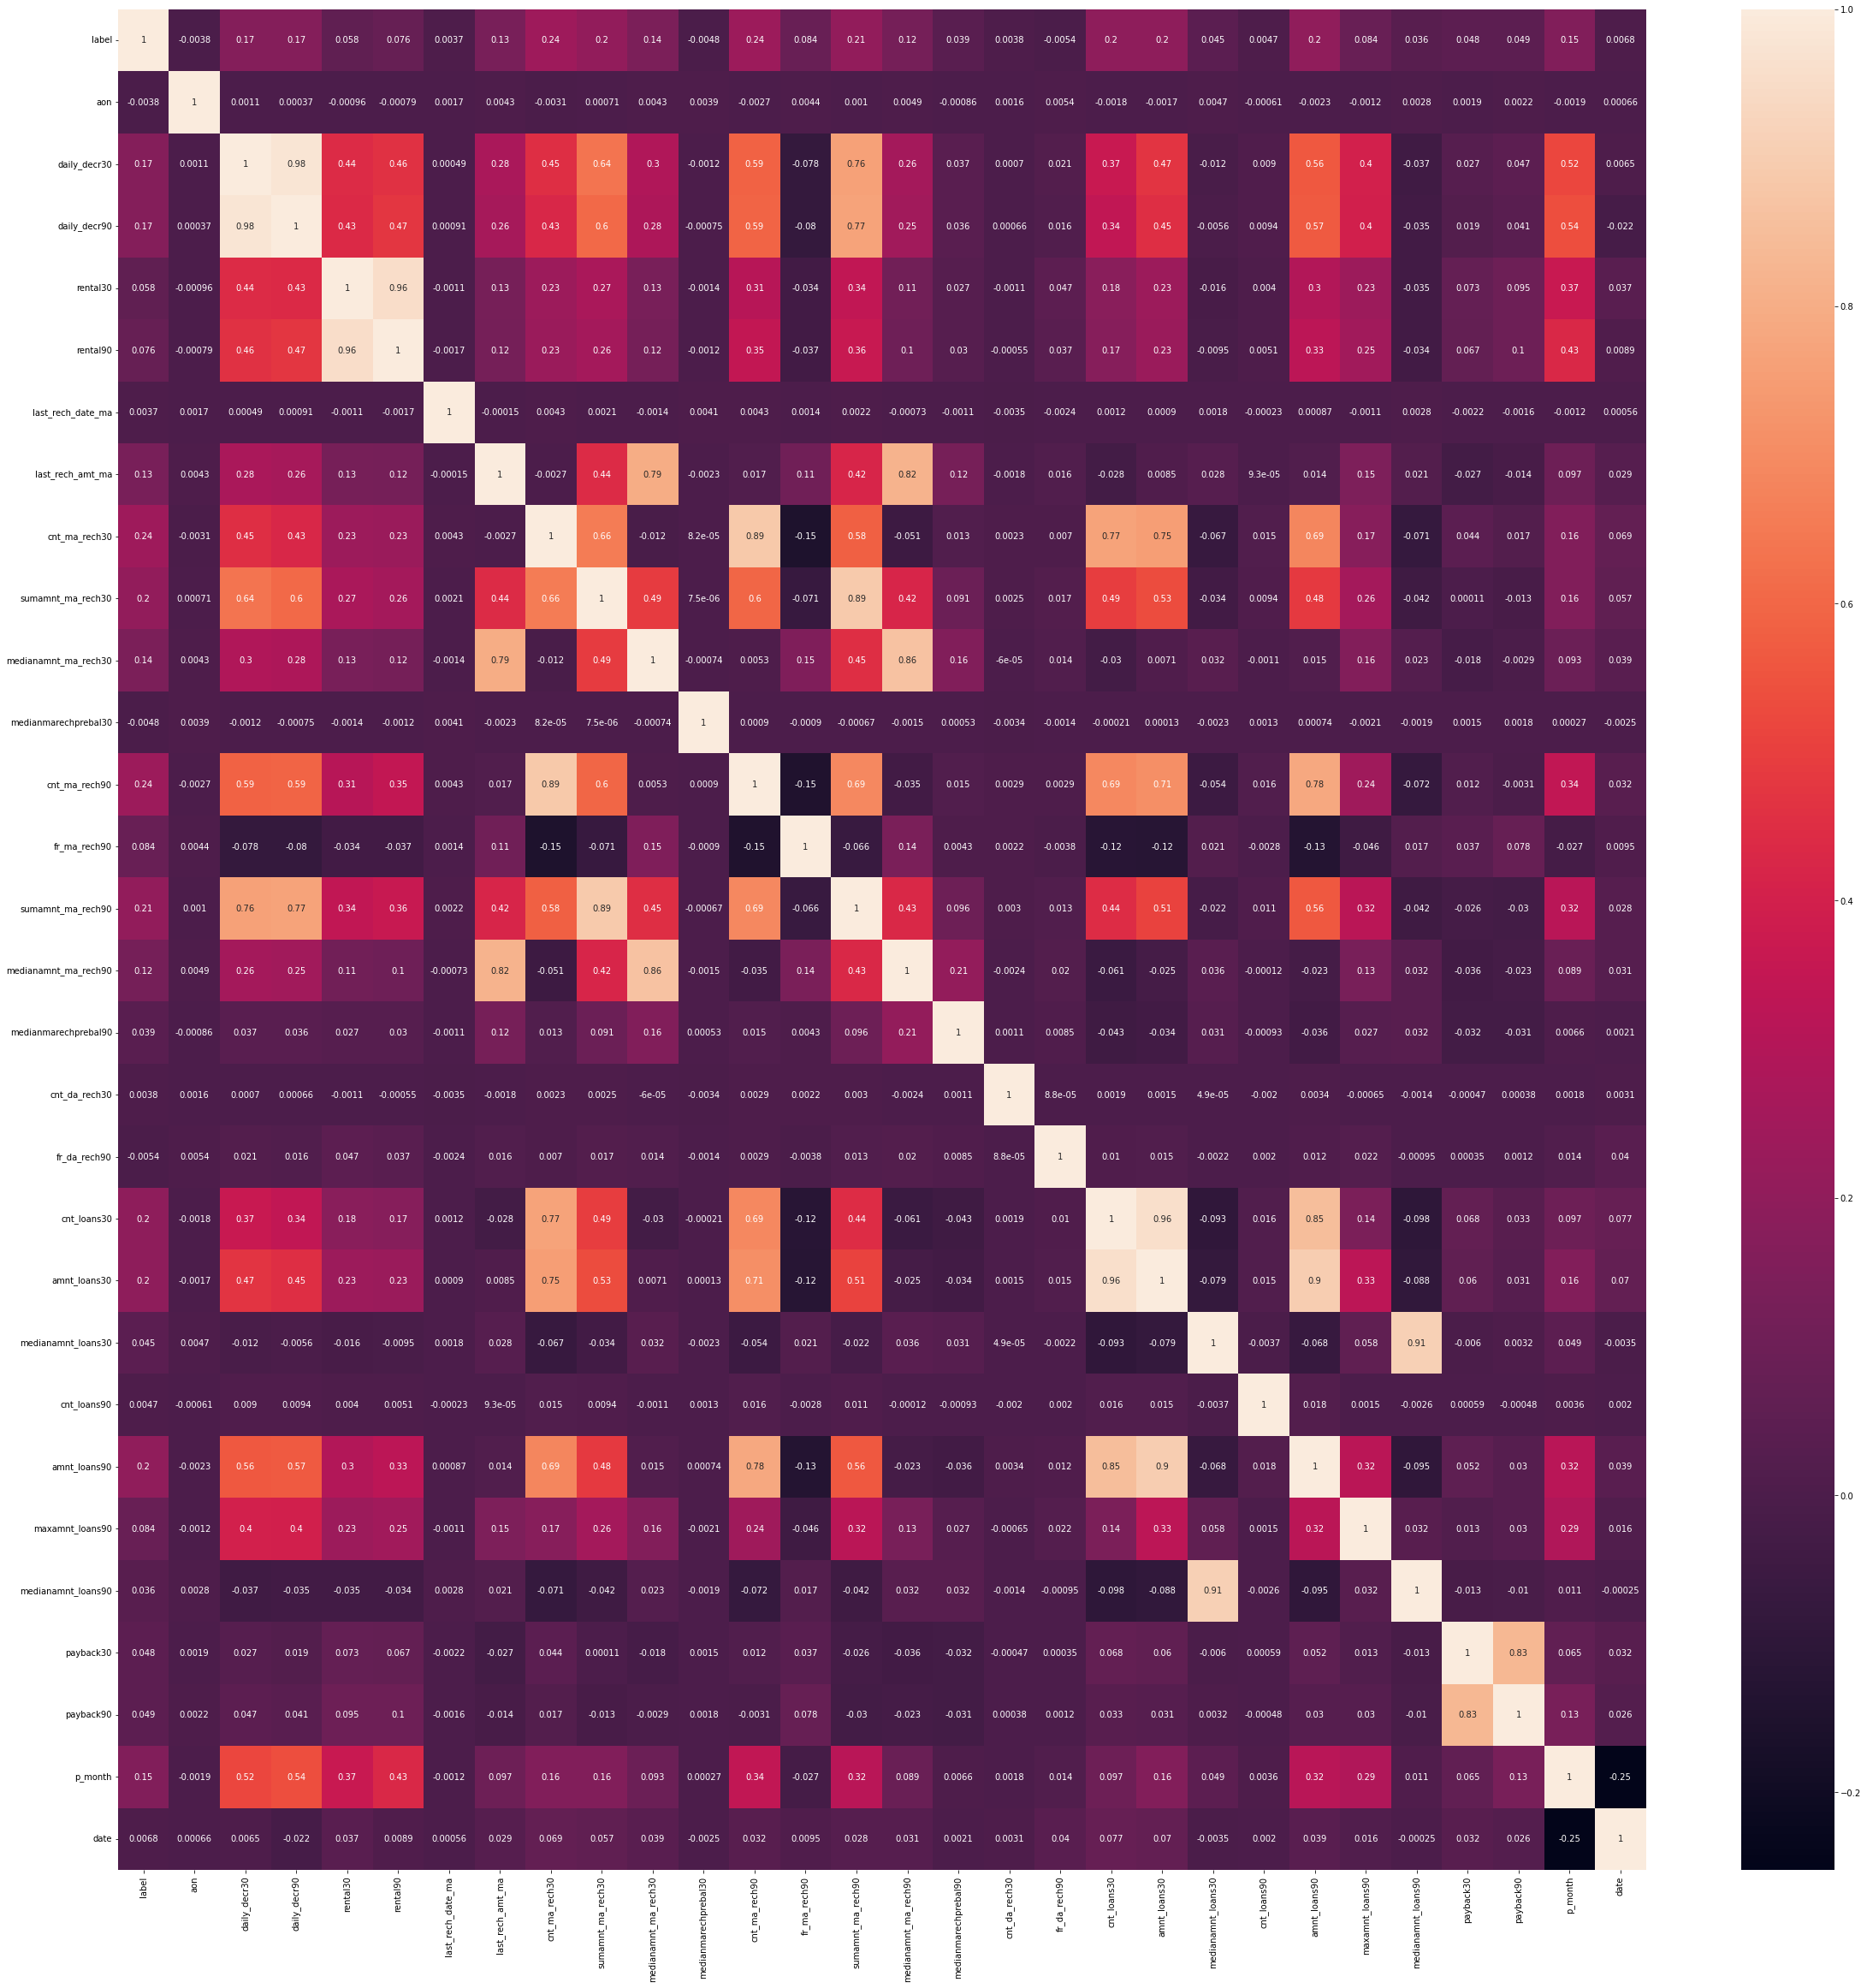

In [40]:
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(),annot=True)


In [18]:
#FROM corelation table daily_decr30 ,rental_30 highly co-related with table daily_decr90,rental_90,so we can drop those columns
df=df.drop(columns=["daily_decr90","rental90"])


/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


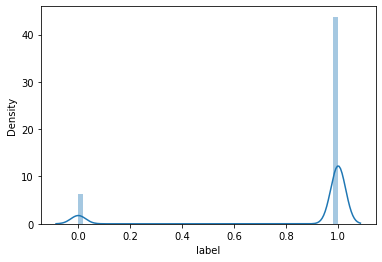

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


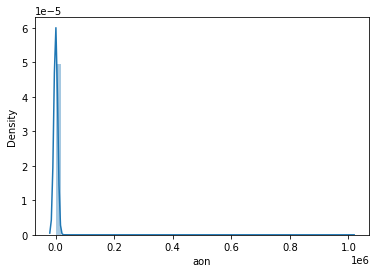

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


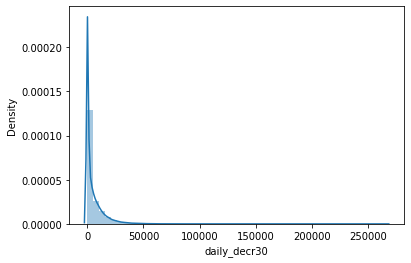

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


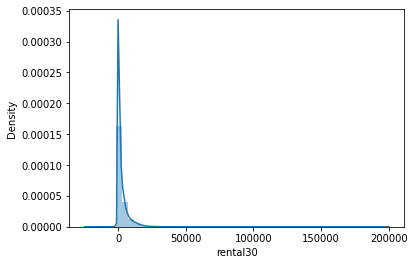

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


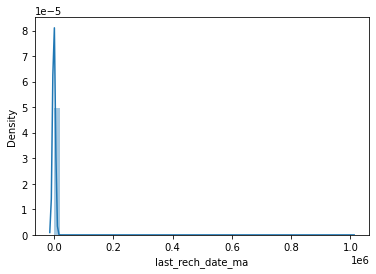

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


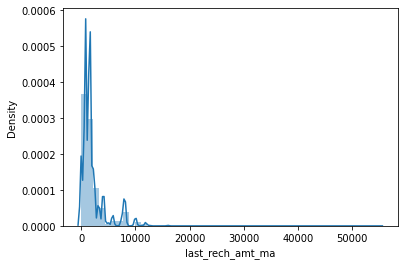

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


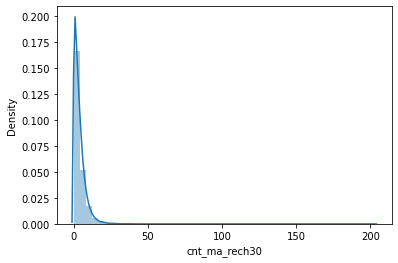

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


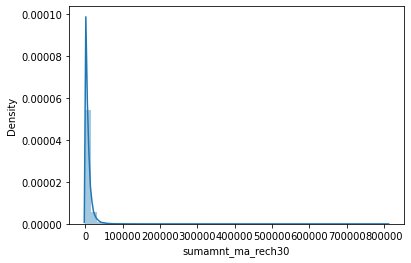

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


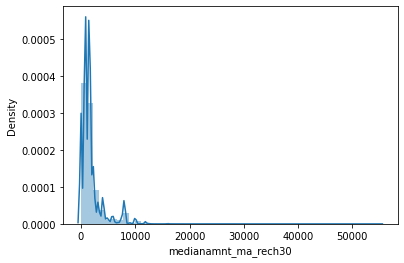

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


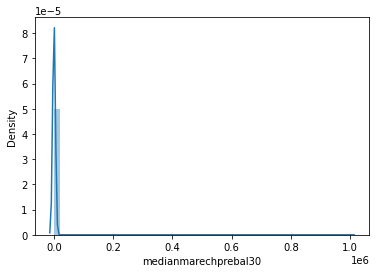

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


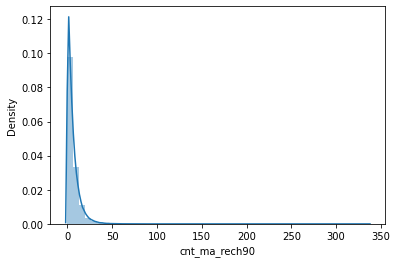

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


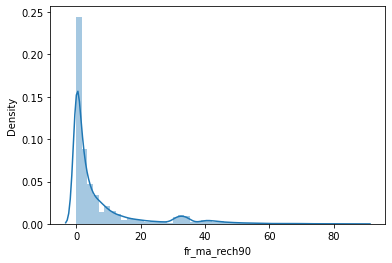

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


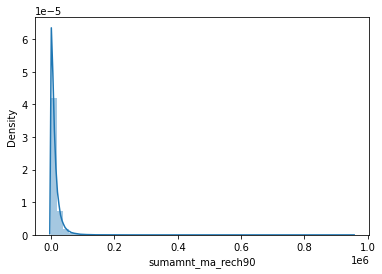

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


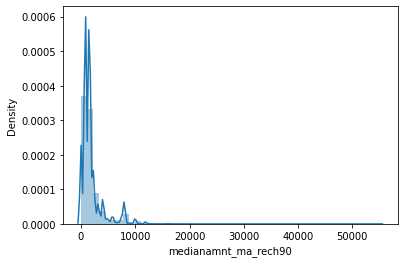

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


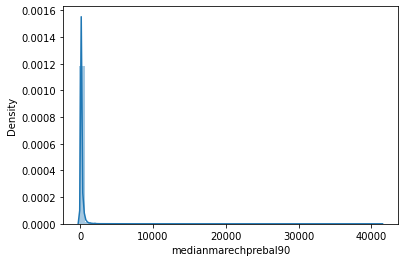

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


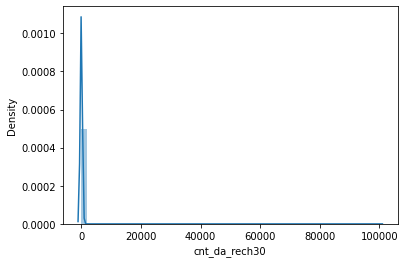

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


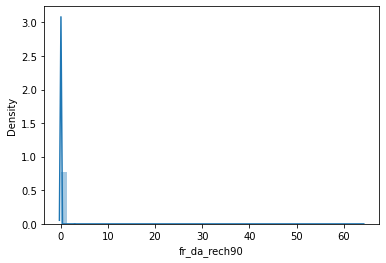

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


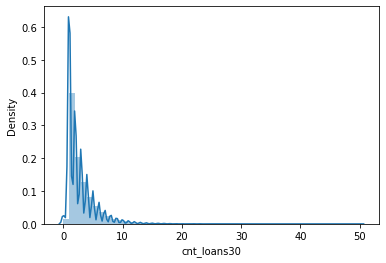

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


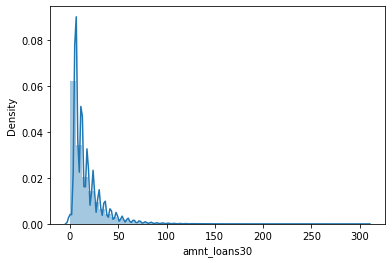

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


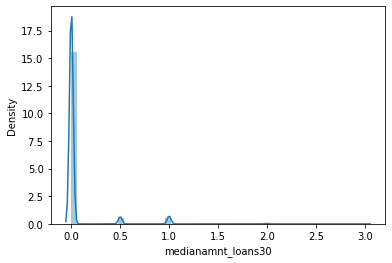

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


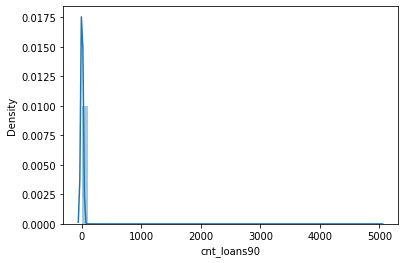

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


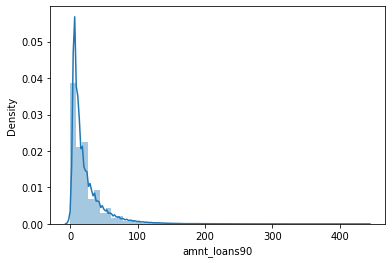

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


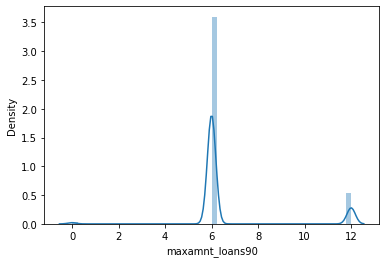

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


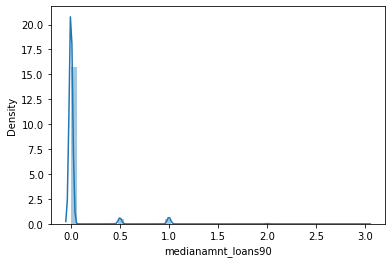

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


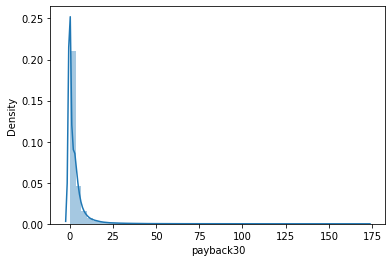

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


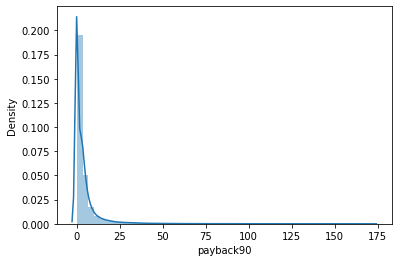

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: could not convert string to float: '2016-07-20'

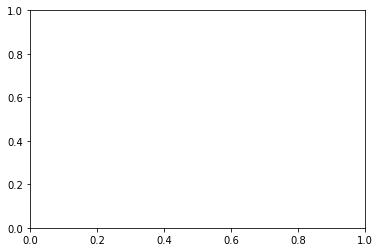

In [20]:
for i in df.columns:
    sns.distplot(df[i])
  
    plt.show()

In [20]:
#check Skewness
df.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
rental30                 4.521929
last_rech_date_ma       14.790974
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans90          1.678304
medianamnt_loans90       4.895720
payback30                8.310695
payback90                6.899951
p_month                  0.343242
date                     0.199845
dtype: float64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   rental30              209593 non-null  float64
 4   last_rech_date_ma     209593 non-null  float64
 5   last_rech_amt_ma      209593 non-null  int64  
 6   cnt_ma_rech30         209593 non-null  int64  
 7   sumamnt_ma_rech30     209593 non-null  float64
 8   medianamnt_ma_rech30  209593 non-null  float64
 9   medianmarechprebal30  209593 non-null  float64
 10  cnt_ma_rech90         209593 non-null  int64  
 11  fr_ma_rech90          209593 non-null  int64  
 12  sumamnt_ma_rech90     209593 non-null  int64  
 13  medianamnt_ma_rech90  209593 non-null  float64
 14  medianmarechprebal90  209593 non-null  float64
 15  

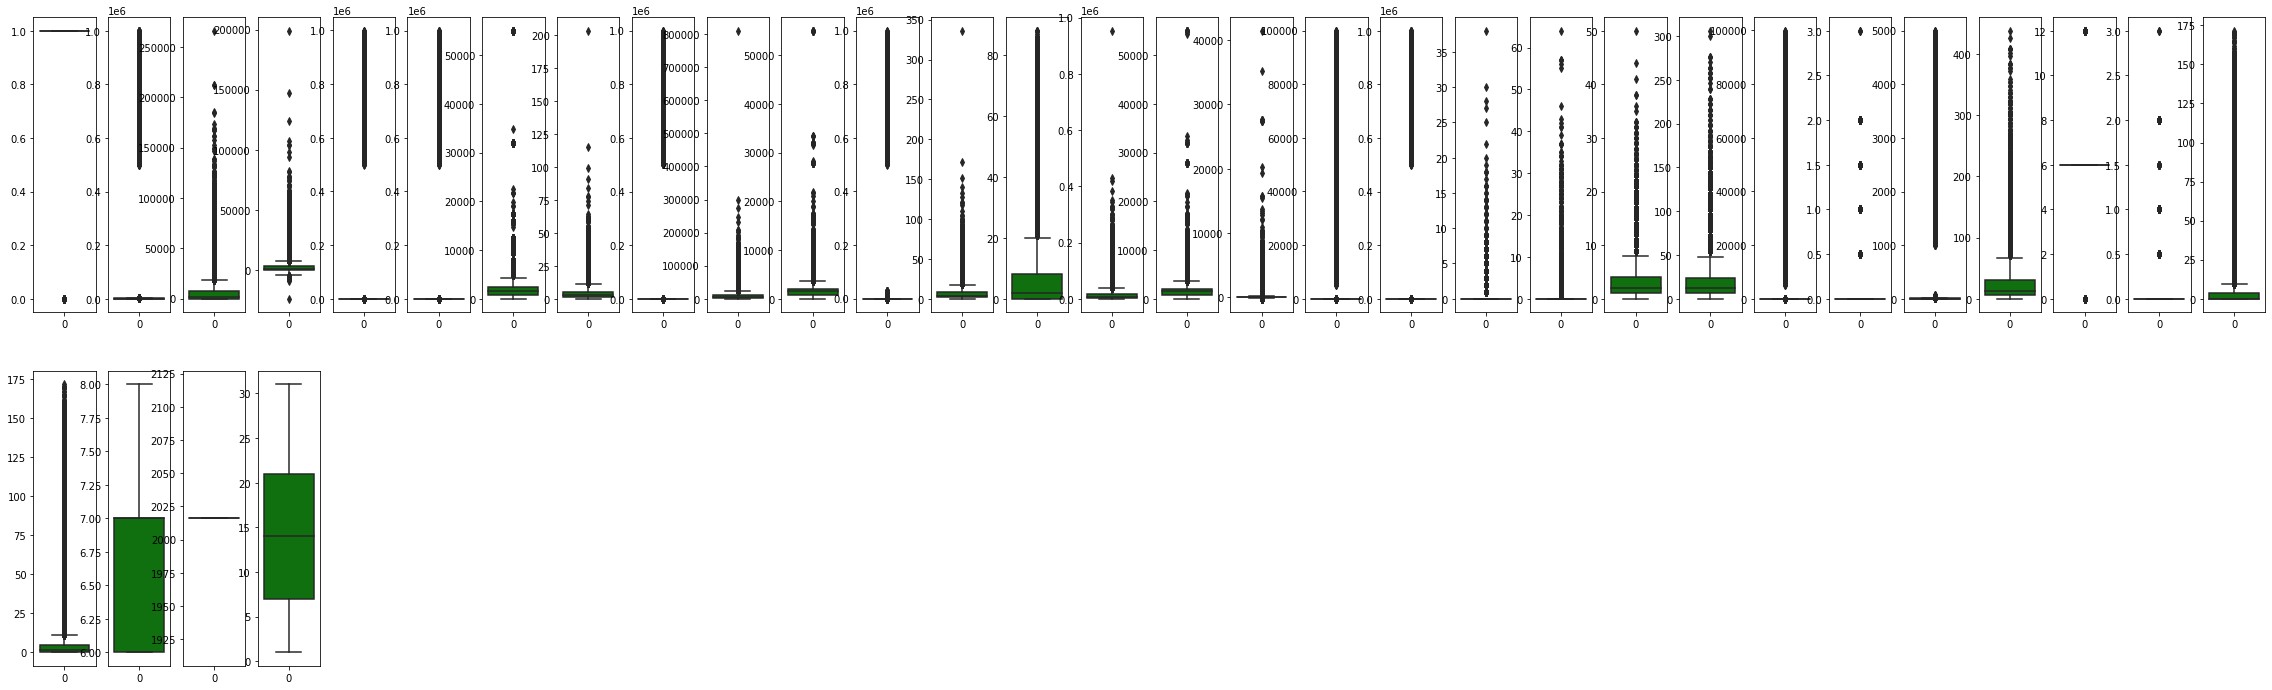

In [70]:
#check for outliers

columnlen=df.columns.values
plt.figure(figsize=(40,90))
for i in range(0,len(columnlen)):
    plt.subplot(14,30,i+1)
    sns.boxplot(data=df[columnlen[i]],orient="v",color="green")

In [20]:
#skewness is present
df.skew()


label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
rental30                 4.521929
last_rech_date_ma       14.790974
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans90          1.678304
medianamnt_loans90       4.895720
payback30                8.310695
payback90                6.899951
p_month                  0.343242
date                     0.199845
dtype: float64

In [ ]:
from scipy import stats
df["aon"]=stats.yeojohnson(df["aon"])[0]
df["last_rech_date_ma"]=stats.yeojohnson(df["last_rech_date_ma"])[0]
df["last_rech_date_da"]=stats.yeojohnson(df["last_rech_date_da"])[0]
df["fr_ma_rech30"]=stats.yeojohnson(df["fr_ma_rech30"])[0]
df["sumamnt_ma_rech30"]=stats.yeojohnson(df["sumamnt_ma_rech30"])[0]
df["medianmarechprebal30"]=stats.yeojohnson(df["medianmarechprebal30"])[0]
df["medianmarechprebal90"]=stats.yeojohnson(df["medianmarechprebal90"])[0]
df["cnt_da_rech30"]=stats.yeojohnson(df["cnt_da_rech30"])[0]
df["fr_da_rech30"]=stats.yeojohnson(df["fr_da_rech30"])[0]
df["cnt_da_rech90"]=stats.yeojohnson(df["cnt_da_rech90"])[0]
df["fr_da_rech90"]=stats.yeojohnson(df["fr_da_rech90"])[0]
df["cnt_loans90"]=stats.yeojohnson(df["cnt_loans90"])[0]
df["maxamnt_loans30"]=stats.yeojohnson(df["maxamnt_loans30"])[0]
df["payback30"]=stats.yeojohnson(df["payback30"])[0]
df["payback90"]=stats.yeojohnson(df["payback90"])[0]

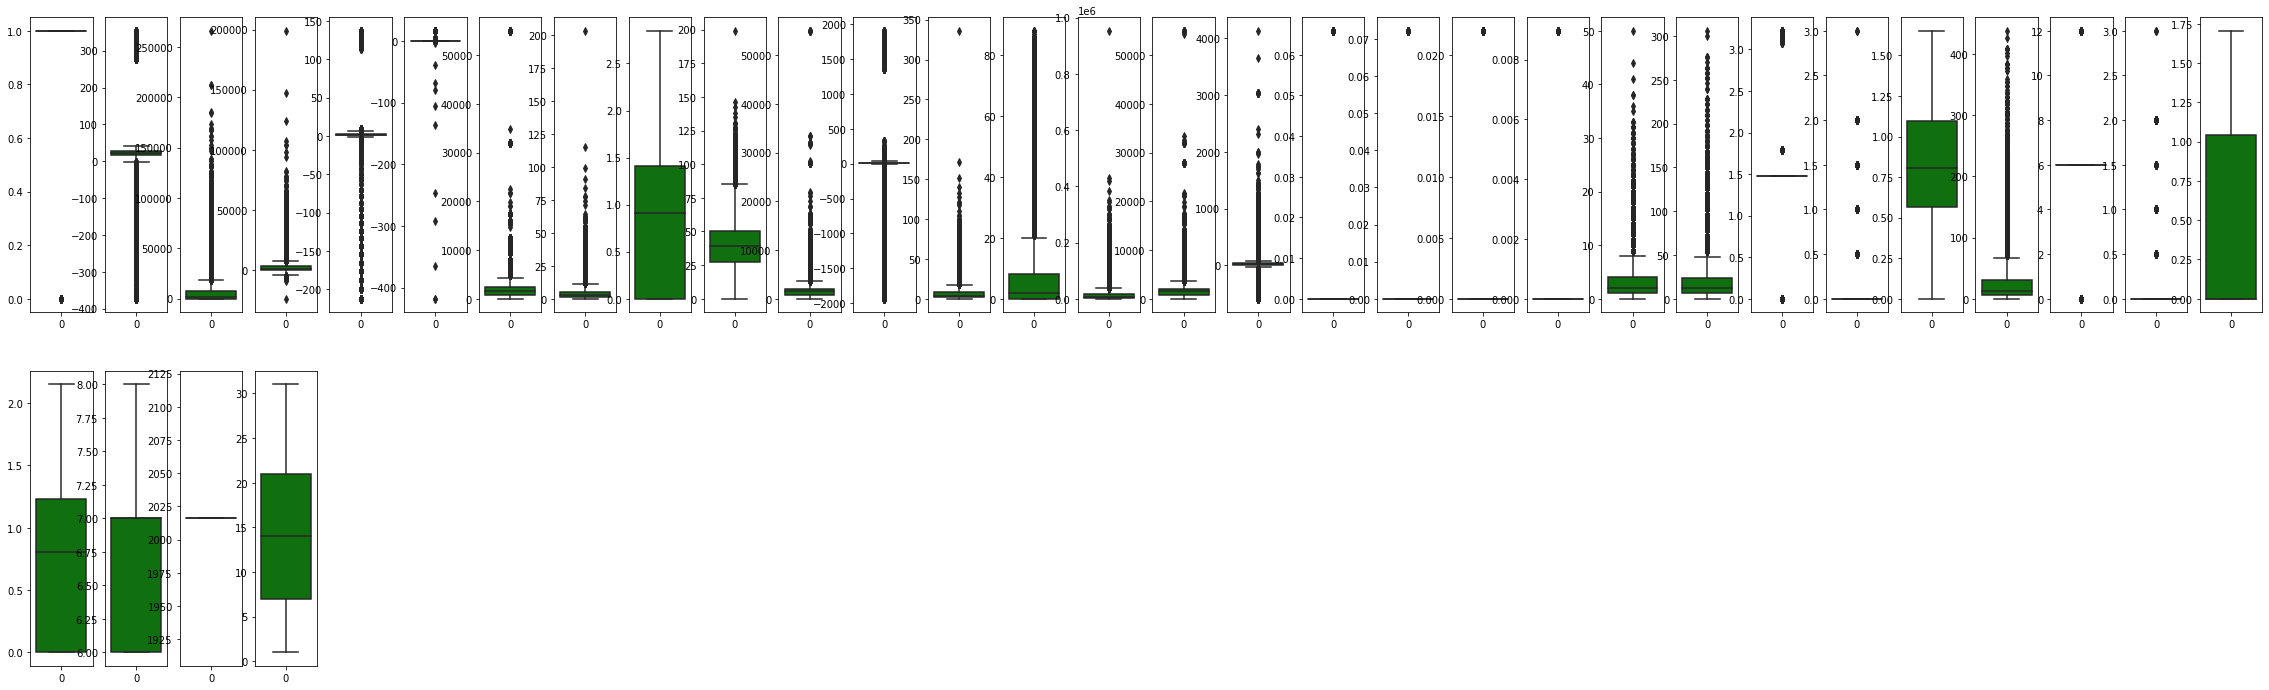

In [73]:
#check for outliers
columnlen=df.columns.values
plt.figure(figsize=(40,90))
for i in range(0,len(columnlen)):
    plt.subplot(14,30,i+1)
    sns.boxplot(data=df[columnlen[i]],orient="v",color="green")

In [22]:
from scipy import stats
z=np.abs(stats.zscore(df))
df=df[(z<7).all(axis=1)]
df.shape

(198424, 28)

In [24]:
x=209895#(#original dataset shape)
y=194389#(#dataset after removing outliers)    
per=(((x-y)/x)*100)
print(per)    

7.387503275447248


In [26]:
#we removed only 7.3 percentage of data

In [25]:
df["label"].value_counts()

1    173496
0     24928
Name: label, dtype: int64

In [26]:
#upsampling
from sklearn.utils import resample
df_upsample = resample(df,
             replace=True,
             n_samples=169976,
             random_state=42)

print(df_upsample.shape)

(169976, 28)


In [27]:
#separate x and y values
x=df.drop(columns="label")
y=df["label"]

In [28]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45,test_size=0.20,)
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [30]:
score=accuracy_score(y_test,y_pred)
score

0.8755197177774978

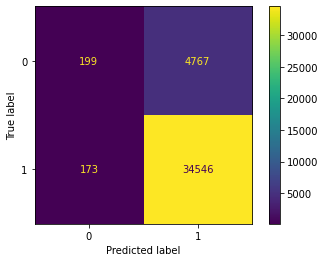

In [31]:
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
display.plot()
plt.show()

In [34]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.04      0.07      4966
           1       0.88      1.00      0.93     34719

    accuracy                           0.88     39685
   macro avg       0.71      0.52      0.50     39685
weighted avg       0.84      0.88      0.83     39685



In [37]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
grid_parameter={
    "criterion":["gini","entropy"],
    "max_depth":range(10,15),
    "min_samples_leaf":range(2,10),
    "min_samples_split":range(3,10),
    "max_leaf_nodes":range(2,4)
}

In [ ]:
grid_search=GridSearchCV(estimator=clf,param_grid=grid_parameter,cv=10,n_jobs=-1)
grid_search.fit(x_train,y_train)

In [ ]:
best_paramter=grid_search.best_params_
print(best_paramter)

In [ ]:
clf=DecisionTreeClassifier(criterion= 'gini', max_depth= 10, max_leaf_nodes= 2, min_samples_leaf= 2, min_samples_split= 3)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
score=accuracy_score(y_test,y_pred)
score

In [ ]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
display.plot()
plt.show()

In [ ]:
print(metrics.classification_report(y_test,y_pred))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc_model=SVC()
params = {'C': [0.001, 0.01, 0.1, 1, 10],'gamma':[0.001, 0.01, 0.1, 1]}
svcClf = GridSearchCV(svc_model, param_grid = params, scoring = 'accuracy', cv = 10)

svcClf.fit(x_train, y_train)

print(svcClf.best_params_)
print(svcClf.best_score_)

In [ ]:
svc_model=SVC()
params = {'C':[1] , 'gamma': [0.01]}
svcClf = GridSearchCV(svc_model, param_grid = params, scoring = 'accuracy', cv = 10)

svcClf.fit(x_train, y_train)

In [ ]:
y_pred=svcClf.predict(x_test)
score=accuracy_score(y_test,y_pred)
score

In [ ]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
display.plot()
plt.show()

In [ ]:
print(metrics.classification_report(y_test,y_pred))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]
#
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
rf.fit(x_train, y_train)

In [ ]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
display.plot()
plt.show()
print(metrics.classification_report(y_test,y_pred))

In [32]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
y_pred=kn.predict(x_test)
score=accuracy_score(y_test,y_pred)
score

0.8802318256268111

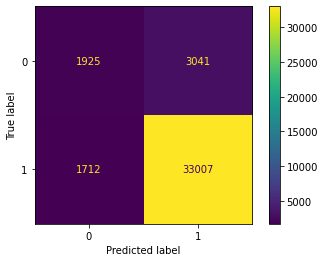

In [33]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
display.plot()
plt.show()

In [34]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.39      0.45      4966
           1       0.92      0.95      0.93     34719

    accuracy                           0.88     39685
   macro avg       0.72      0.67      0.69     39685
weighted avg       0.87      0.88      0.87     39685



In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,plot_roc_curve
disp=plot_roc_curve(clf,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svcClf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)

In [ ]:
disp=plot_roc_curve(clf,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svcClf,x_train,y_train,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)

In [ ]:
#i tried to execute decision tree,Randomforest , svm but it taking more then one day so i could not complete it. but i am done with my code
#among two KNeighborsClassifier is the best model


import pickle
filename="Survive"
pickle.dump(kn,open(filename,"wb"))